In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import gridspec
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading data.

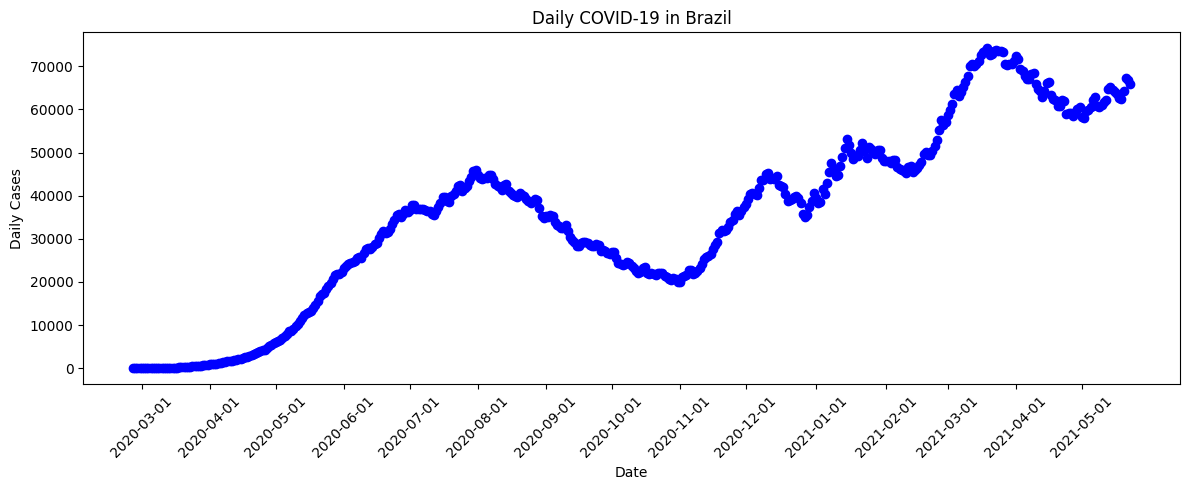

In [2]:
df = pd.read_csv('brazil_covid19_macro.csv') 
cases = np.diff(df['cases'].values)
cases = pd.Series(cases).rolling(window=20, center=True, min_periods=1).mean().values
dates = df['date'].values[1:]
days = np.array([i for i in range(cases.shape[0])], dtype='float32')
tick_indices = [i for i, d in enumerate(dates) if d.endswith('-01')]
tick_labels = [dates[i] for i in tick_indices]

total_len = len(cases)  
train_size = int(0.8 * total_len)
val_size = int(0.1 * total_len)
test_size = total_len - train_size - val_size

cases_train = cases[:train_size + val_size]
cases_test = cases[train_size + val_size:]

days_train = days[:train_size + val_size]
days_test = days[train_size + val_size:]

plt.figure(figsize=(12, 5))
plt.scatter(days, cases, marker='o', c='blue')
plt.title('Daily COVID-19 in Brazil')
plt.ylabel('Daily Cases')
plt.xlabel('Date')
plt.xticks(ticks=tick_indices, labels=tick_labels, rotation=45)
plt.tight_layout()
plt.show()

Loading models metrics.

In [3]:
model_keys = [
    'mlp', 
    'anfis',
    'rnn',
    'ranfis',
    'gru',
    'gruanfis',
    'lstm',
    'lstmanfis',
    'birnn',
    'biranfis',
    'bigru',
    'bigruanfis',
    'bilstm',
    'bilstmanfis'
]

file_names = [
    'preds',
    'rmse',
    'mae',
    'mape',
    'params'
]

data = {}

for model in model_keys:
    data.update({model : {}})
    for info in file_names:
        data[model].update({info : np.load('data/' + info + '.npz')[model]})

Organizing data.

In [4]:
classical_architectures = [
    'MLP', 
    'RNN', 
    'GRU', 
    'LSTM', 
    'BiRNN', 
    'BiGRU', 
    'BiLSTM'
]

fuzzy_architectures = [
    'ANFIS', 
    'RANFIS', 
    'GRU-ANFIS', 
    'LSTM-ANFIS', 
    'BiRANFIS', 
    'BiGRU-ANFIS', 
    'BiLSTM-ANFIS'
]

model_names = classical_architectures + fuzzy_architectures

model_groups = {
    'Non-Recurrent': ['MLP', 'ANFIS'],
    'RNNs': ['RNN', 'BiRNN', 'RANFIS', 'BiRANFIS'],
    'GRUs': ['GRU', 'BiGRU', 'GRU-ANFIS', 'BiGRU-ANFIS'],
    'LSTMs': ['LSTM', 'BiLSTM', 'LSTM-ANFIS', 'BiLSTM-ANFIS']
}

rmse_fuzzy = [data[model]['rmse'] for model in model_keys if 'anfis' in model]
rmse_classical = [data[model]['rmse'] for model in model_keys if 'anfis' not in model]
mae_fuzzy = [data[model]['mae'] for model in model_keys if 'anfis' in model]
mae_classical = [data[model]['mae'] for model in model_keys if 'anfis' not in model]
mape_fuzzy = [data[model]['mape'] for model in model_keys if 'anfis' in model]
mape_classical = [data[model]['mape'] for model in model_keys if 'anfis' not in model]
params_fuzzy = [data[model]['params'] for model in model_keys if 'anfis' in model]
params_classical = [data[model]['params'] for model in model_keys if 'anfis' not in model]

metrics = ['RMSE', 'MAE', 'MAPE', r'$\theta$']
colors = ['red', 'orange', 'purple', 'green', 'brown', 'deeppink', 'lime']

color_map = {}
for i in range(len(colors)):
    color_map.update({classical_architectures[i] : colors[i]})
    color_map.update({fuzzy_architectures[i] : colors[i]})
    
marker_map = {}
for i in range(len(colors)):
    marker_map.update({classical_architectures[i] : 's'})
    marker_map.update({fuzzy_architectures[i] : 'x'})

## Bar Plot

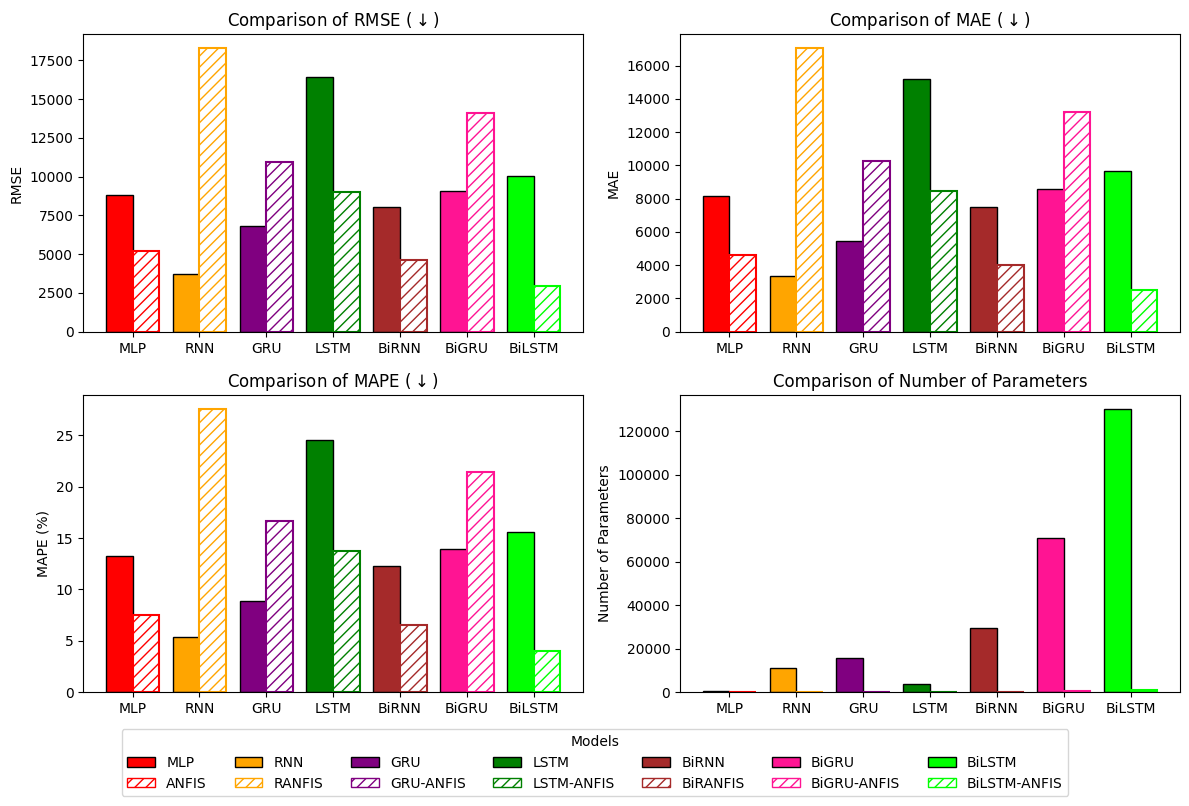

In [5]:
x = np.arange(len(classical_architectures))
width = 0.4

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].bar(x - width/2, rmse_classical, width, color=colors, edgecolor='black')
axes[0, 0].bar(x + width/2, rmse_fuzzy, width, color='white', edgecolor=colors, hatch='///', linewidth=1.5)
axes[0, 0].set_title('Comparison of RMSE $(\downarrow)$')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(classical_architectures)

axes[0, 1].bar(x - width/2, mae_classical, width, color=colors, edgecolor='black')
axes[0, 1].bar(x + width/2, mae_fuzzy, width, color='white', edgecolor=colors, hatch='///', linewidth=1.5)
axes[0, 1].set_title('Comparison of MAE $(\downarrow)$')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(classical_architectures)

axes[1, 0].bar(x - width/2, mape_classical, width, color=colors, edgecolor='black')
axes[1, 0].bar(x + width/2, mape_fuzzy, width, color='white', edgecolor=colors, hatch='///', linewidth=1.5)
axes[1, 0].set_title('Comparison of MAPE $(\downarrow)$')
axes[1, 0].set_ylabel('MAPE (%)')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(classical_architectures)

axes[1, 1].bar(x - width/2, params_classical, width, color=colors, edgecolor='black')
axes[1, 1].bar(x + width/2, params_fuzzy, width, color='white', edgecolor=colors, hatch='///', linewidth=1.5)
axes[1, 1].set_title('Comparison of Number of Parameters')
axes[1, 1].set_ylabel('Number of Parameters')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(classical_architectures)

legend_elements = []
for color, arch_cla, arch_fuzz in zip(colors, classical_architectures, fuzzy_architectures):
    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=arch_cla))
    legend_elements.append(Patch(facecolor='white', edgecolor=color, hatch='///', label=arch_fuzz))

fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=7,
    frameon=True,
    title='Models',
    bbox_to_anchor=(0.5, -0.06)
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Radar Plot

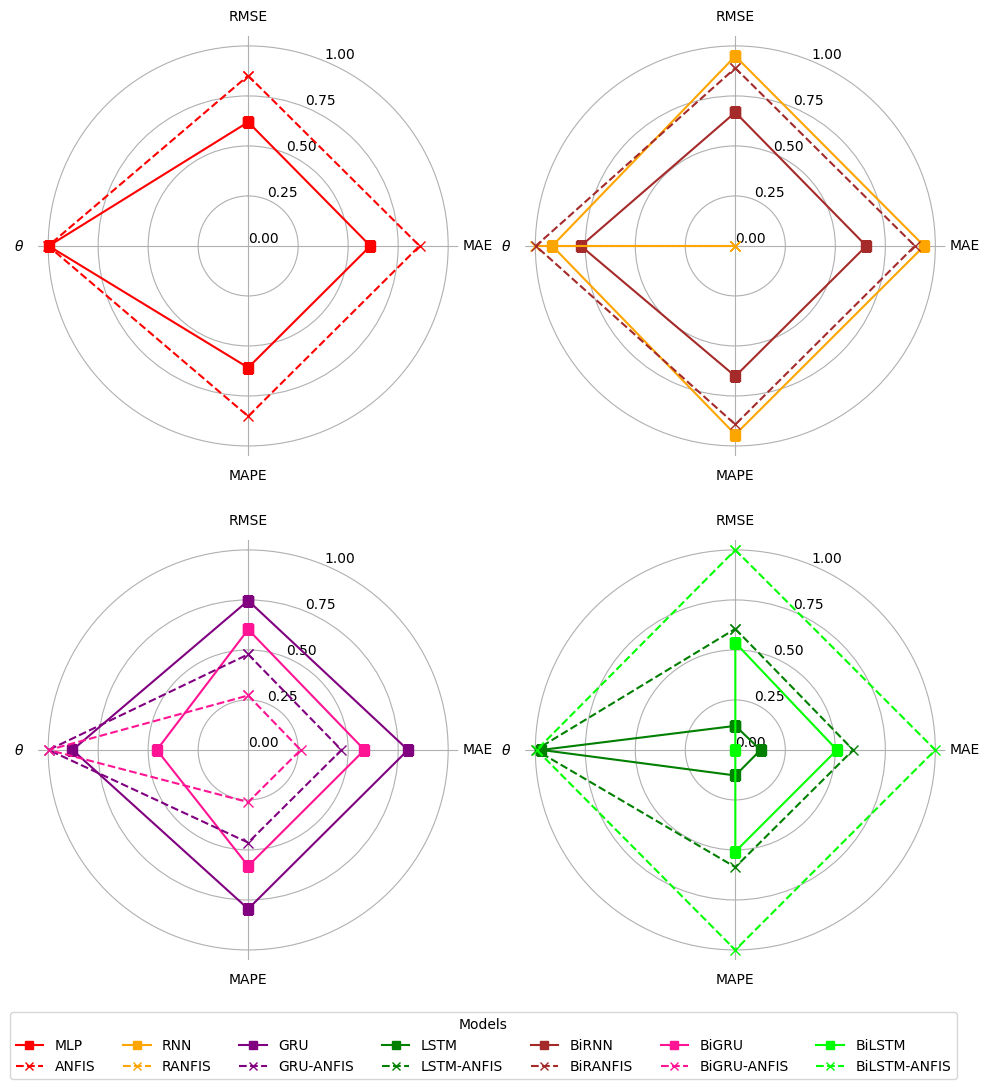

In [6]:
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

metrics_matrix = np.array([
    rmse_classical + rmse_fuzzy,
    mae_classical + mae_fuzzy,
    mape_classical + mape_fuzzy,
    params_classical + params_fuzzy
])

normalized_metrics = np.zeros_like(metrics_matrix)
for i, metric in enumerate(metrics):
    normalized_metrics[i] = 1 - ((metrics_matrix[i] - np.min(metrics_matrix[i])) / 
                                 (np.max(metrics_matrix[i]) - np.min(metrics_matrix[i])))

fig, axs = plt.subplots(2, 2, figsize=(12, 12), 
                       subplot_kw={'polar': True},
                       gridspec_kw={'wspace': 0.1, 'hspace': 0.2})
axs = axs.flatten()

for ax, (group_name, models) in zip(axs, model_groups.items()):
    model_indices = [model_names.index(m) for m in models if m in model_names]
    
    for idx in model_indices:
        model_name = model_names[idx]
        values = normalized_metrics[:, idx].tolist()
        values += values[:1]
        
        if 'ANFIS' in model_name:
            linestyle = '--'
            marker = 'x'
        else:
            linestyle = '-'
            marker = 's'
        
        ax.plot(
            angles, 
            values, 
            color=color_map[model_name],
            linewidth=1.5, 
            linestyle=linestyle,
            marker=marker, 
            markersize=7, 
            label=model_name
        )
        
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_rgrids([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_ylim(0, 1.05)
    ax.spines['polar'].set_visible(False)
    
legend_elements = []
for color, arch_cla, arch_fuzz in zip(colors, classical_architectures, fuzzy_architectures):
    legend_elements.append(Line2D([0], [0], label=arch_cla, marker='s', linestyle='-', color=color))
    legend_elements.append(Line2D([0], [0], label=arch_fuzz, marker='x', linestyle='--', color=color))

plt.legend(
    handles=legend_elements,
    loc='lower center',
    bbox_to_anchor=(-0.1, -0.3),
    title='Models',
    ncol=7,
    frameon=True
)

plt.show()

## Scatter Plot

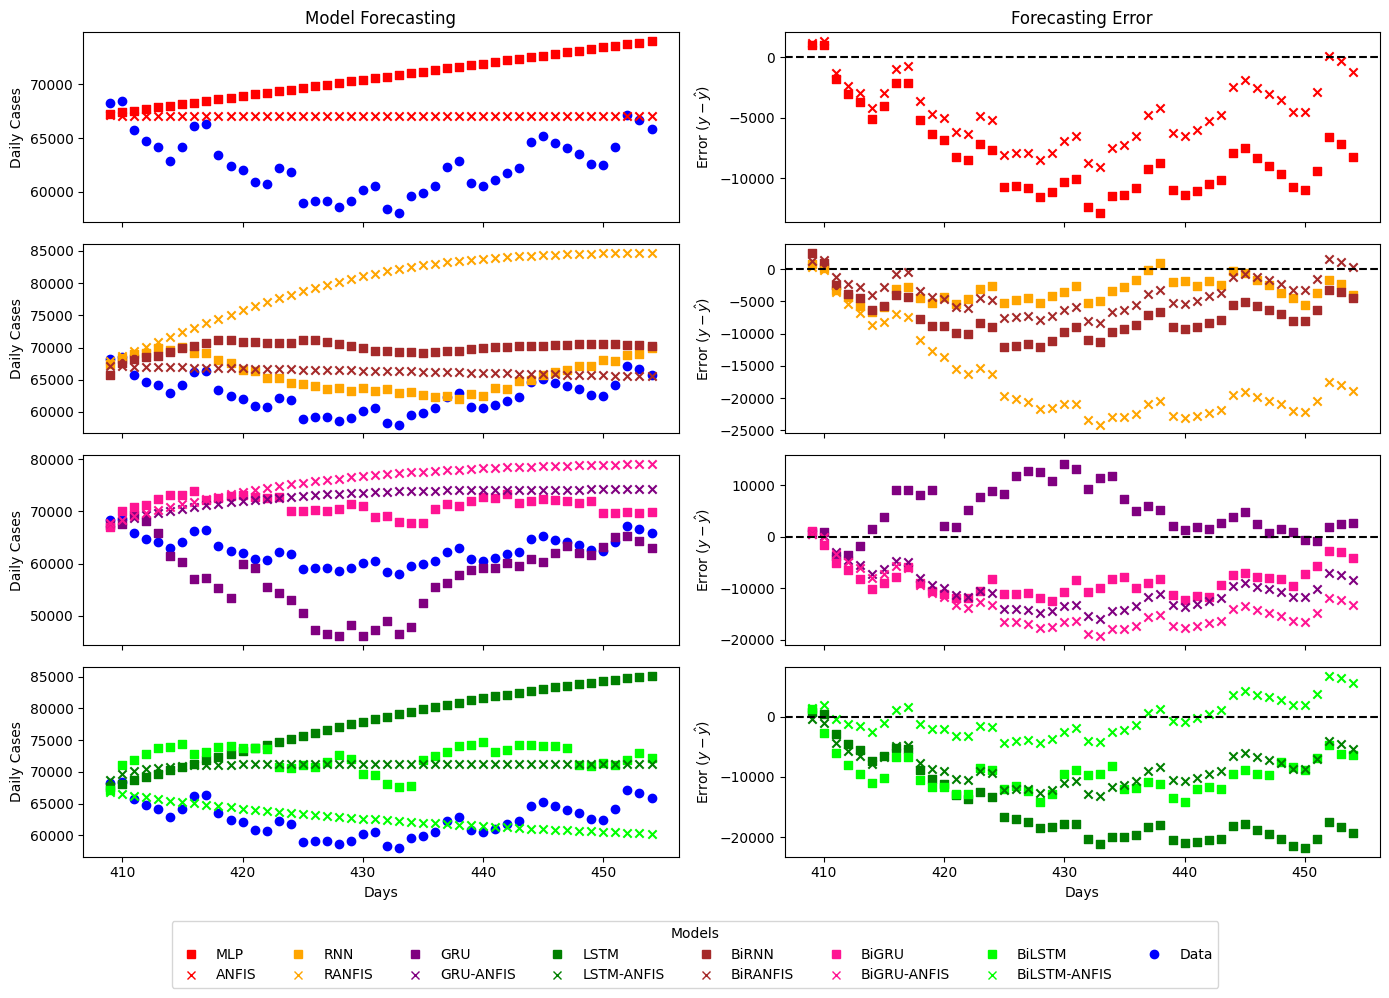

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

ax[0, 0].set_title('Model Forecasting')
ax[0, 1].set_title('Forecasting Error')
ax[3, 0].set_xlabel('Days')
ax[3, 1].set_xlabel('Days')

for i in range(4):
    ax[i, 0].scatter(days_test, cases_test, label='Data', c='blue')
    ax[i, 0].set_ylabel("Daily Cases")
    
    ax[i, 1].axhline(0, linestyle='--', c='black')
    ax[i, 1].set_ylabel(r"Error $(y - \hat{y})$")
    
    group, models = list(model_groups.items())[i]
    for model_name in models:
        if 'ANFIS' in model_name:
            marker = 'x'
        else:
            marker = 's' 
        ax[i, 0].scatter(
            days_test, 
            data[model_name.lower().replace("-", "")]['preds'], 
            label=model_name,
            marker=marker,
            c=color_map[model_name]
        )
        ax[i, 1].scatter(
            days_test,
            cases_test - data[model_name.lower().replace("-", "")]['preds'],
            label=model_name,
            marker=marker,
            c=color_map[model_name]
        )

legend_elements = []
for color, arch_cla, arch_fuzz in zip(colors, classical_architectures, fuzzy_architectures):
    legend_elements.append(Line2D([0], [0], label=arch_cla, marker='s', linestyle='None', color=color))
    legend_elements.append(Line2D([0], [0], label=arch_fuzz, marker='x', linestyle='None', color=color))
legend_elements.append(Line2D([0], [0], marker='o', linestyle='None', color='blue', label='Data'))
    
fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=8,
    frameon=True,
    title='Models',
    bbox_to_anchor=(0.5, -0.03)
)

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.show()

## Parallel Coordinate Plot

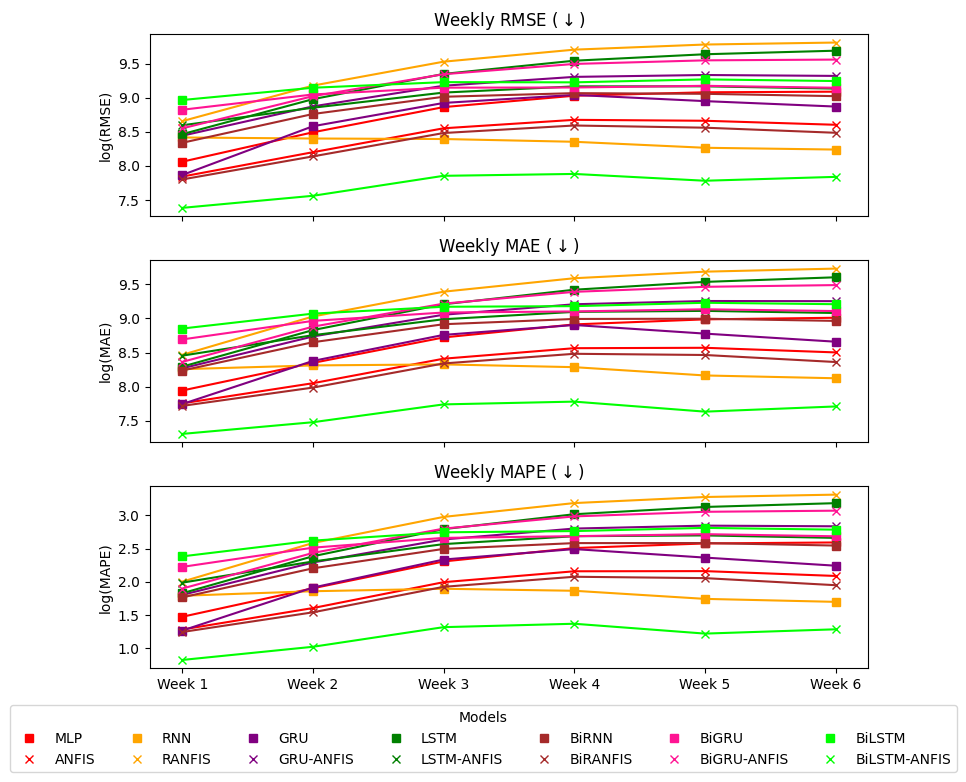

In [8]:
preds = [
    data[model_name.lower().replace("-", "")]['preds'] for model_name in list(color_map.keys())
]

periods = [7, 14, 21, 28, 35, 42]

rmse_over_time = []
mae_over_time = []
mape_over_time = []

for p in periods:
    rmse_p, mae_p, mape_p, r2_p = [], [], [], []
    for y_hat in preds:
        y_true = cases_test[:p]
        y_pred = y_hat[:p]
        rmse_p.append(np.sqrt(mean_squared_error(y_true, y_pred)))
        mae_p.append(mean_absolute_error(y_true, y_pred))
        mape_p.append(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    rmse_over_time.append(rmse_p)
    mae_over_time.append(mae_p)
    mape_over_time.append(mape_p)

rmse_over_time = np.log(np.array(rmse_over_time))
mae_over_time = np.log(np.array(mae_over_time))
mape_over_time = np.log(np.array(mape_over_time))

fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

for i in range(len(preds)):
    axes[0].plot(
        periods, 
        rmse_over_time[:, i], 
        color=color_map[list(color_map.keys())[i]], 
        marker=marker_map[list(color_map.keys())[i]]
    )
    
axes[0].set_title("Weekly RMSE $(\downarrow)$")
axes[0].set_ylabel("log(RMSE)")

for i in range(len(preds)):
    axes[1].plot(
        periods, 
        mae_over_time[:, i], 
        color=color_map[list(color_map.keys())[i]],
        marker=marker_map[list(color_map.keys())[i]]
    )
    
axes[1].set_title("Weekly MAE $(\downarrow)$")
axes[1].set_ylabel("log(MAE)")

for i in range(len(preds)):
    axes[2].plot(
        periods, 
        mape_over_time[:, i], 
        color=color_map[list(color_map.keys())[i]],  
        marker=marker_map[list(color_map.keys())[i]]
    )
    
axes[2].set_title("Weekly MAPE $(\downarrow)$")
axes[2].set_xticks(ticks=periods, labels=[f'Week {int(i/7)}' for i in periods])
axes[2].set_ylabel("log(MAPE)")

legend_elements = []
for color, arch_cla, arch_fuzz in zip(colors, classical_architectures, fuzzy_architectures):
    legend_elements.append(Line2D([0], [0], label=arch_cla, marker='s', linestyle='None', color=color))
    legend_elements.append(Line2D([0], [0], label=arch_fuzz, marker='x', linestyle='None', color=color))

fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=7,
    frameon=True,
    title='Models',
    bbox_to_anchor=(0.5, -0.01)
)

plt.tight_layout(rect=[0, 0.08, 1, 0.97])
plt.show()

## Heatmap Plot

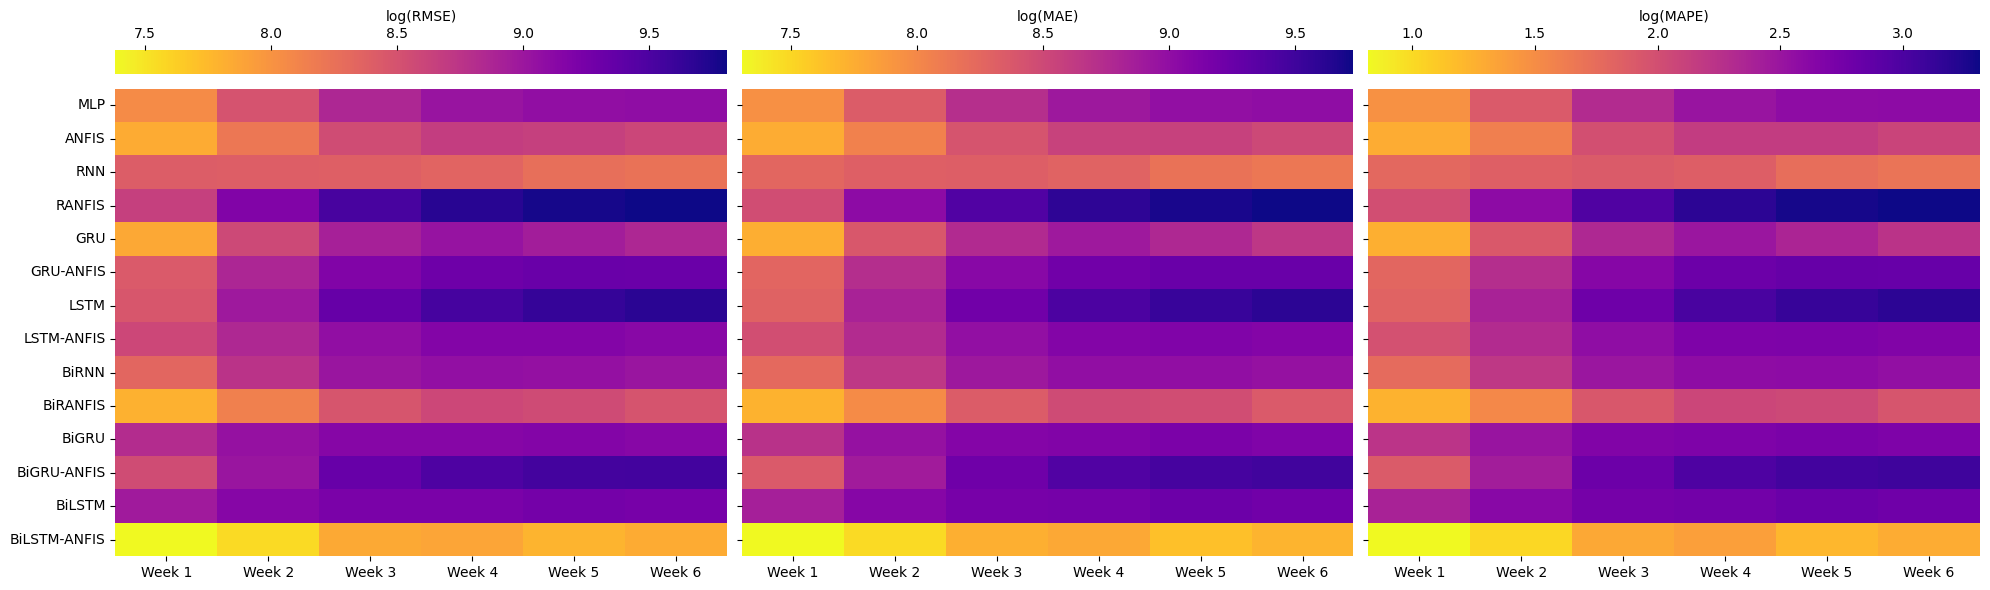

In [9]:
metrics_dict = {
    "RMSE": rmse_over_time,
    "MAE": mae_over_time,
    "MAPE": mape_over_time,
}

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[0.05, 1]) 

axes = []
cbar_axes = []

for idx, (name, value) in enumerate(metrics_dict.items()):
    ax = plt.subplot(gs[1, idx])
    axes.append(ax)
    
    cax = plt.subplot(gs[0, idx])
    cbar_axes.append(cax)
    
    heatmap = seaborn.heatmap(
        value.T,
        ax=ax,
        cmap="plasma_r",
        xticklabels=[f"Week {i//7}" for i in periods],
        yticklabels=list(color_map.keys()),
        cbar=True,
        cbar_ax=cax,
        cbar_kws={
            "orientation": "horizontal",
            "label": f"log({name})",
        }
    )
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.xaxis.set_ticks_position('top')     
    cbar.ax.xaxis.set_label_position('top')      
    cbar.ax.set_xlabel(cbar.ax.get_xlabel(), loc='center')  

    if idx != 0:
        ax.set_yticklabels([])
        ax.set_ylabel("")

plt.tight_layout()
plt.show()